In [2]:
import pandas as pd
from ml_toolkit.metrics import model_experiment

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Metricas
from sklearn.metrics import classification_report, jaccard_score, roc_auc_score, f1_score, recall_score, precision_score, accuracy_score

In [3]:
df = pd.read_csv("C:/Users/lyes_/Desktop/Second Project Hab/second-project/data/Data Machine Failure with Measurements.csv", sep = ';')
df

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No
3,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No
4,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,66,79,Operator8,937,0,2,1875,1719,219,748,1901,819,546,901,1512,1477,537,410,7,No
8780,60,77,Operator8,379,3,0,814,1990,1606,1346,962,875,1067,608,251,1476,522,943,8,No
8781,61,77,Operator8,595,3,1,1659,1134,1314,907,1119,1623,272,1149,1951,1835,1554,200,9,No
8782,72,81,Operator8,1038,3,2,254,1400,564,216,1011,1909,502,470,1331,1696,229,1192,10,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Temperature                   8784 non-null   int64 
 1   Humidity                      8784 non-null   int64 
 2   Operator                      8784 non-null   object
 3   Measure1                      8784 non-null   int64 
 4   Measure2                      8784 non-null   int64 
 5   Measure3                      8784 non-null   int64 
 6   Measure4                      8784 non-null   int64 
 7   Measure5                      8784 non-null   int64 
 8   Measure6                      8784 non-null   int64 
 9   Measure7                      8784 non-null   int64 
 10  Measure8                      8784 non-null   int64 
 11  Measure9                      8784 non-null   int64 
 12  Measure10                     8784 non-null   int64 
 13  Measure11         

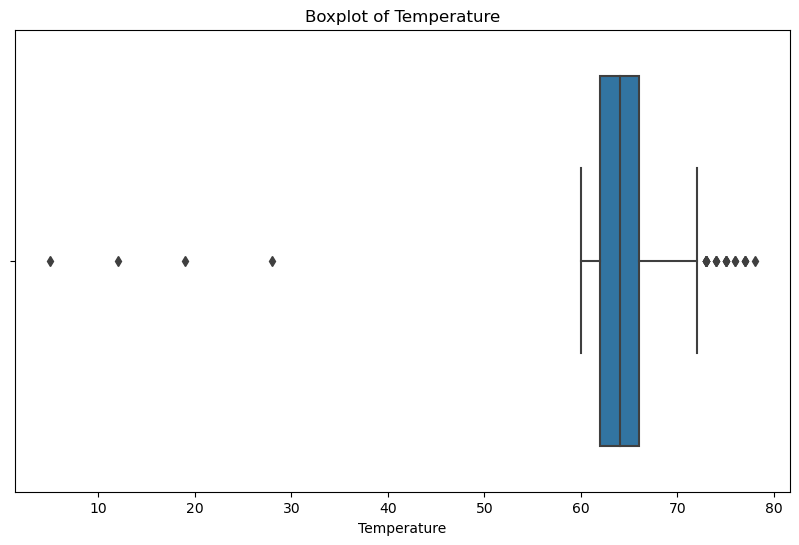

In [5]:
# Convert the variable temperature to numeric
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')

# Create a boxplot for 'Temperature'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [6]:
# Calculo los cuartiles
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

# Defino el criterio de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico los outliers
outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]

print(outliers)

      Temperature  Humidity   Operator  Measure1  Measure2  Measure3  \
1392           12        79  Operator2      1975         1         2   
3015           73        88  Operator2       969         3         1   
3175           73        72  Operator1       999         0         1   
3316           28        82  Operator1      1686         3         2   
3756           75        85  Operator3      1122         2         0   
4590           73        72  Operator7      1745         3         0   
4593           74        69  Operator2       876         0         0   
4596           73        74  Operator2      1865         0         1   
4944           19        88  Operator7       344         1         2   
5118           77        77  Operator1      1558         0         0   
5165           73        89  Operator7       516         2         0   
5935           73        69  Operator2       725         3         1   
5937           75        68  Operator4      1222         0      

In [7]:
# Identify factor and integer variables
factor_vars = ['Operator', 'Measure2', 'Measure3', 'Failure']
int_vars = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure']

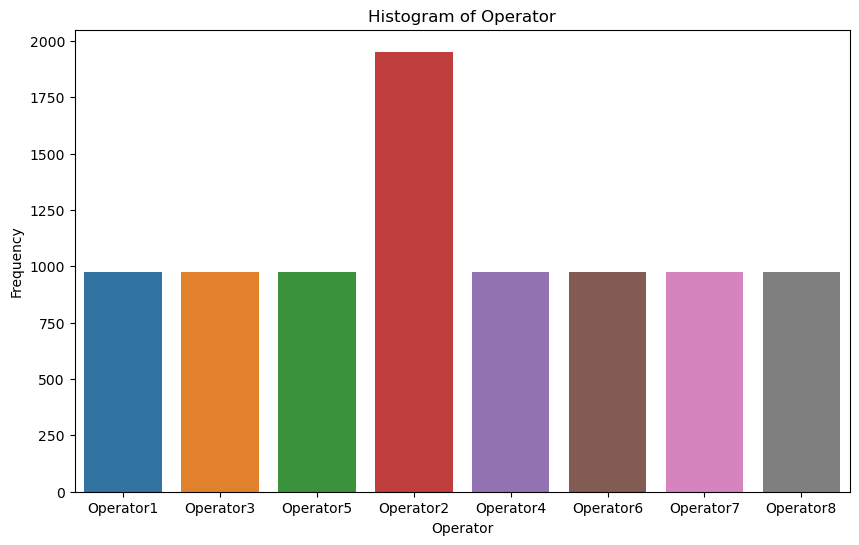

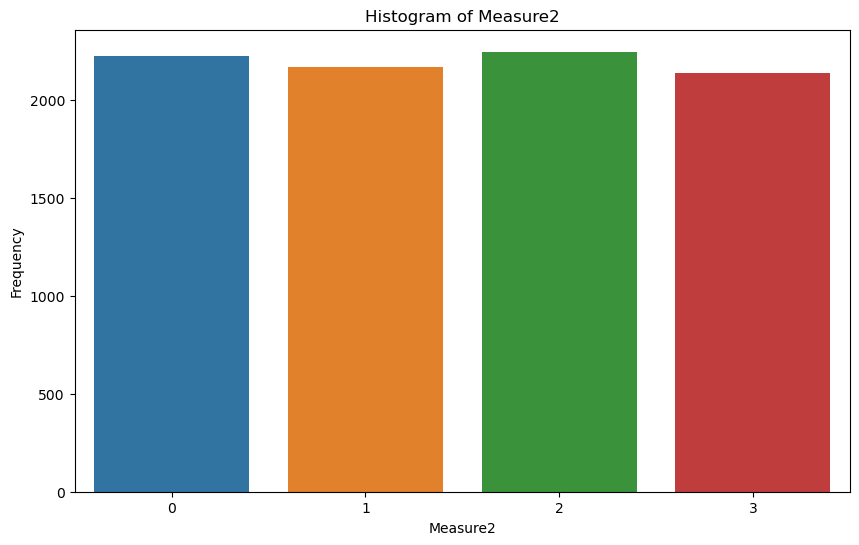

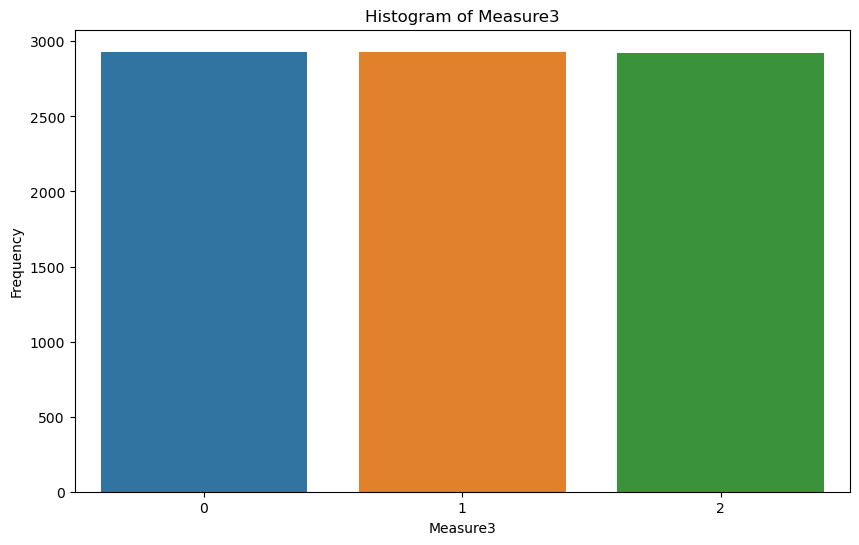

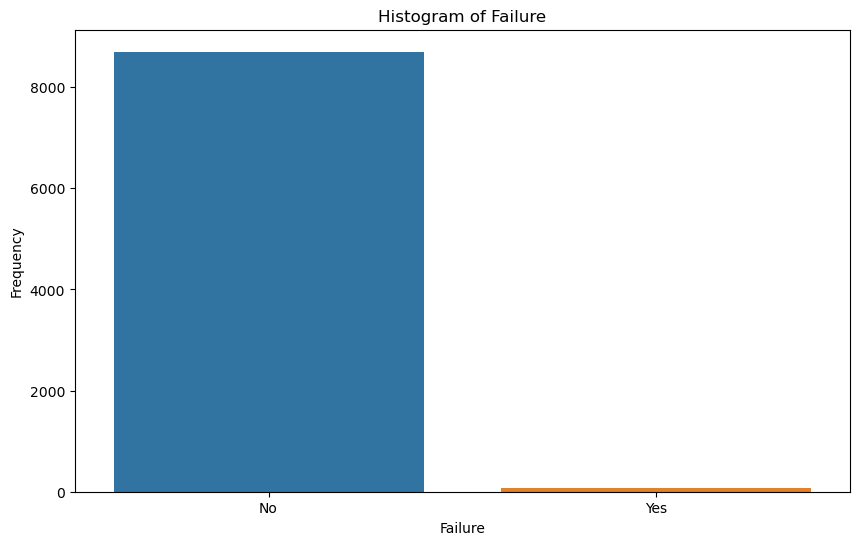

In [8]:
# Plot histograms for factor variables
for var in factor_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### Factor Variables: We use a countplot to show the frequency of each category within these variables.

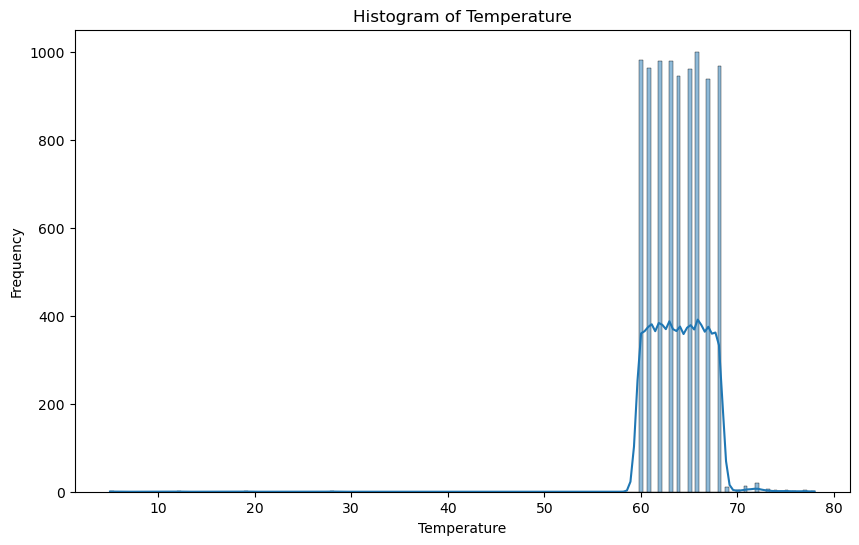

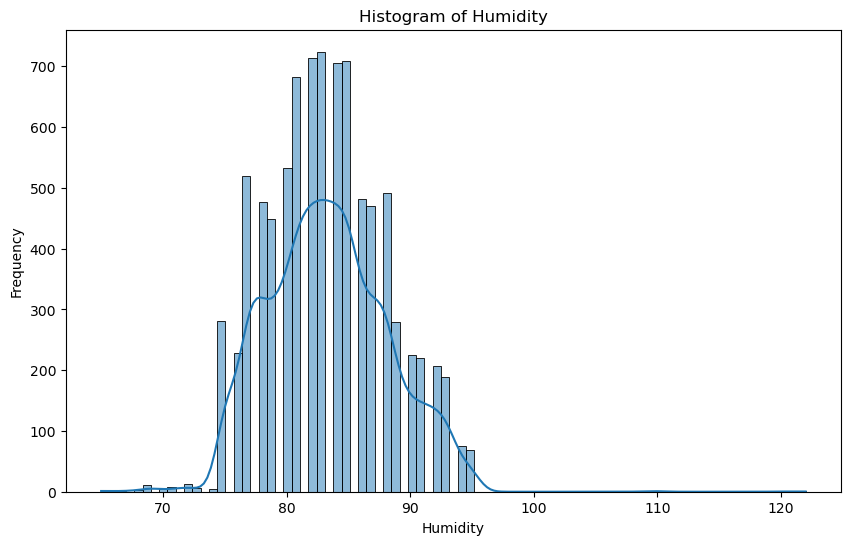

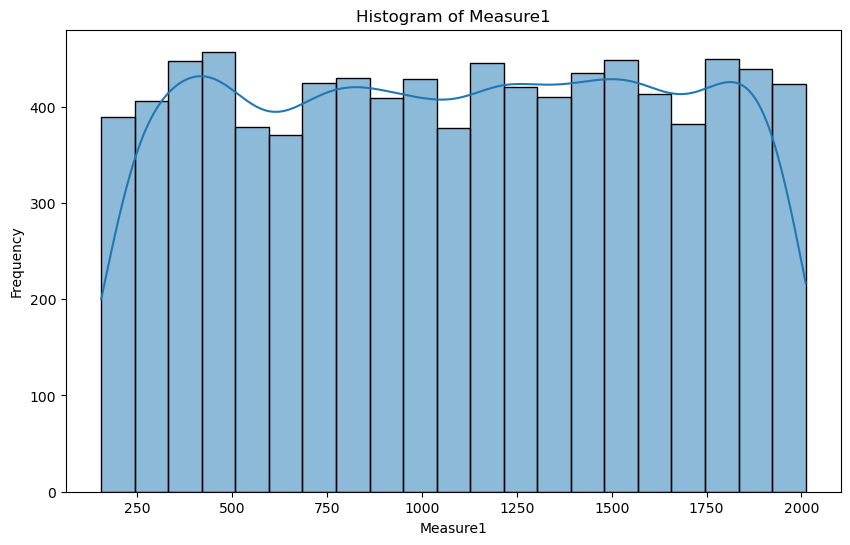

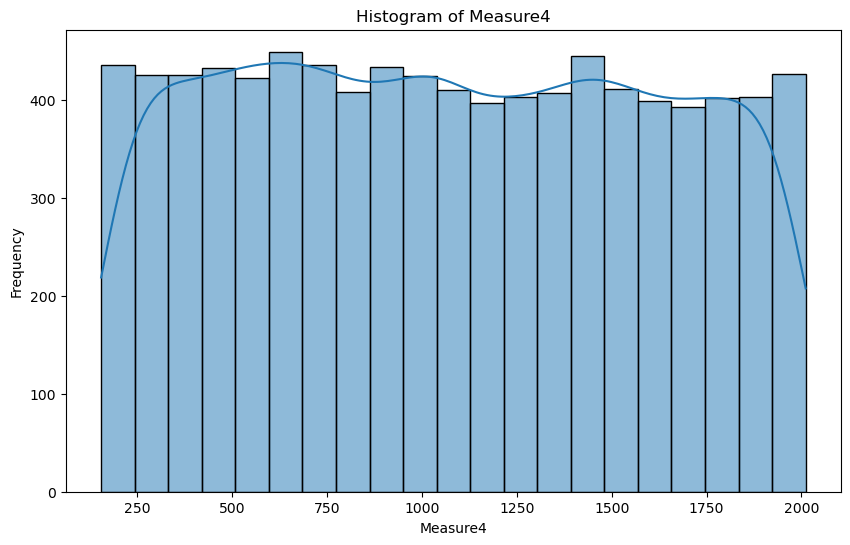

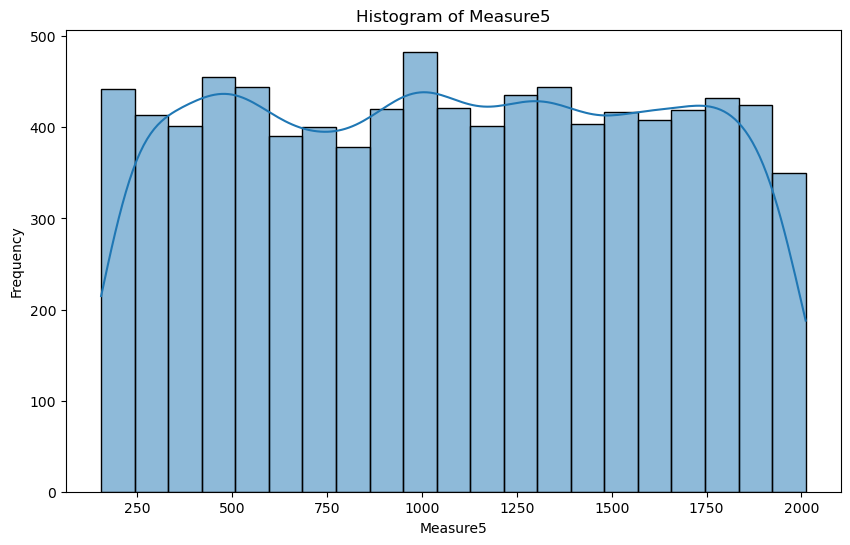

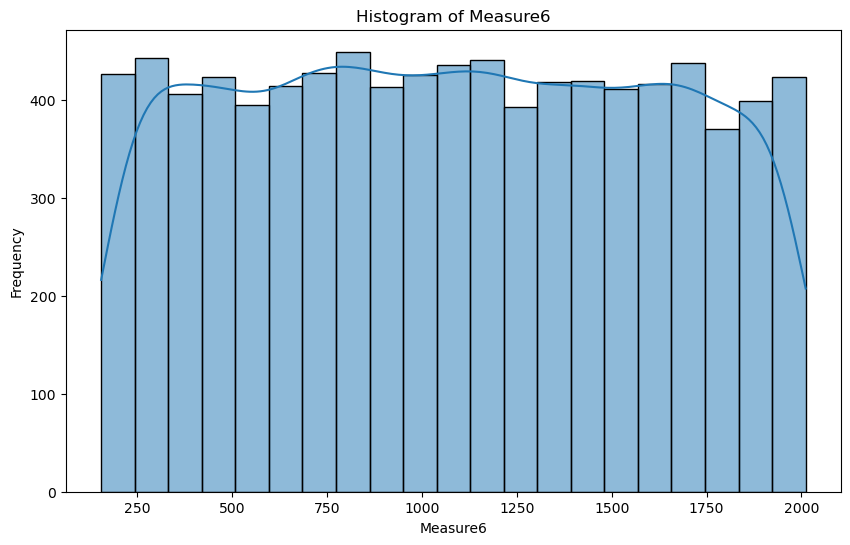

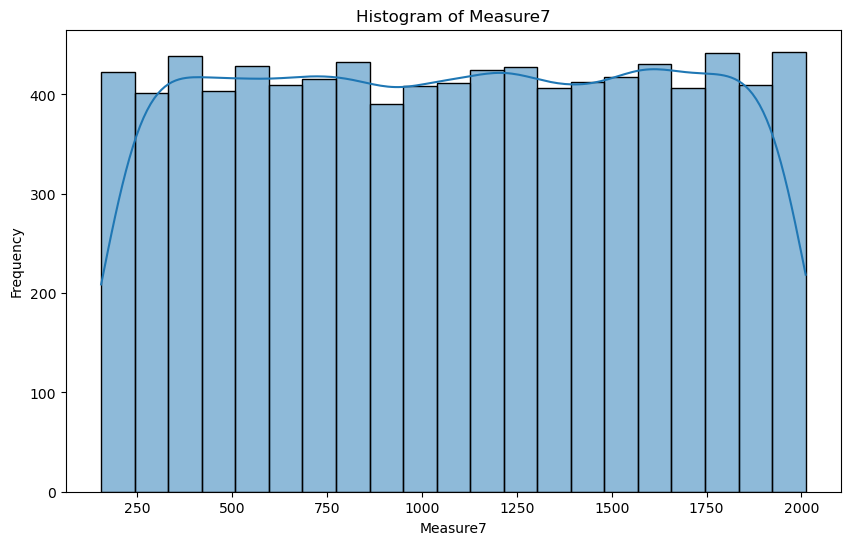

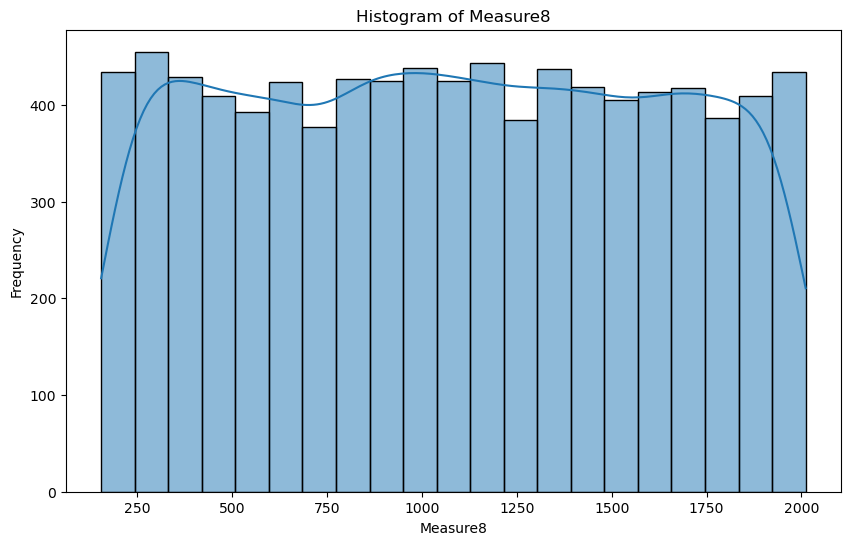

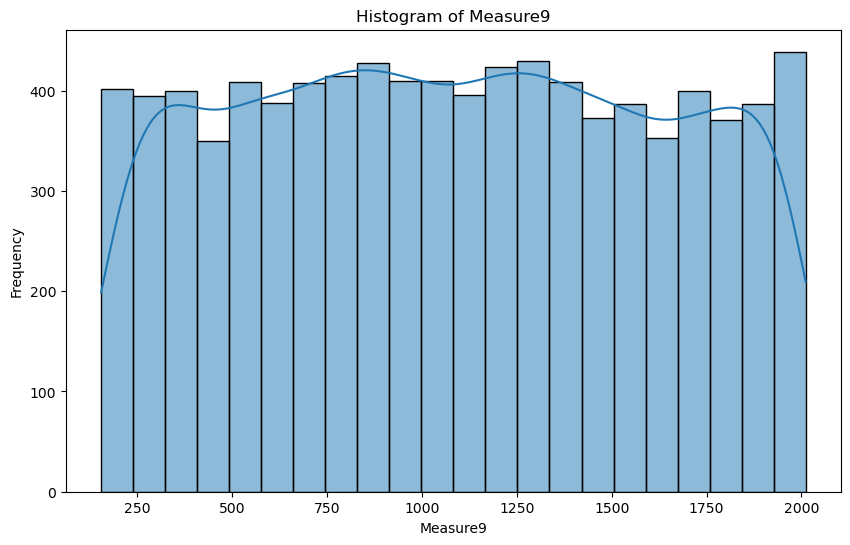

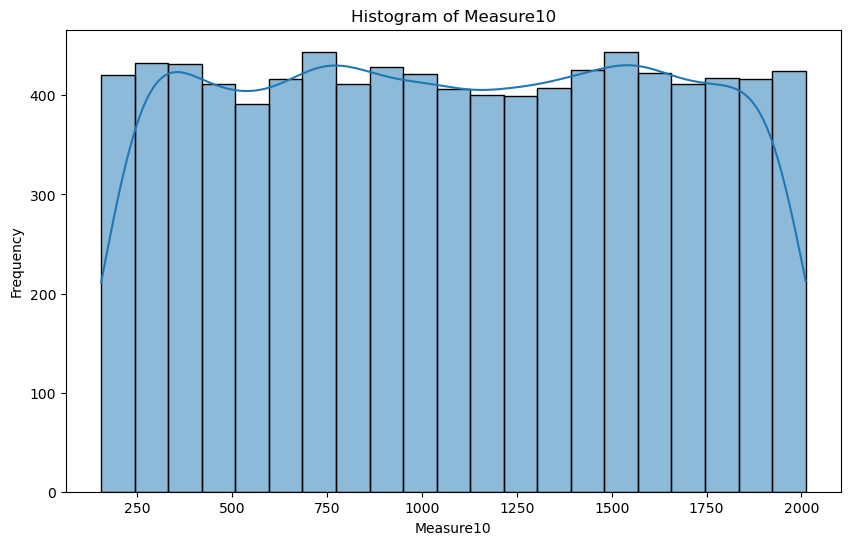

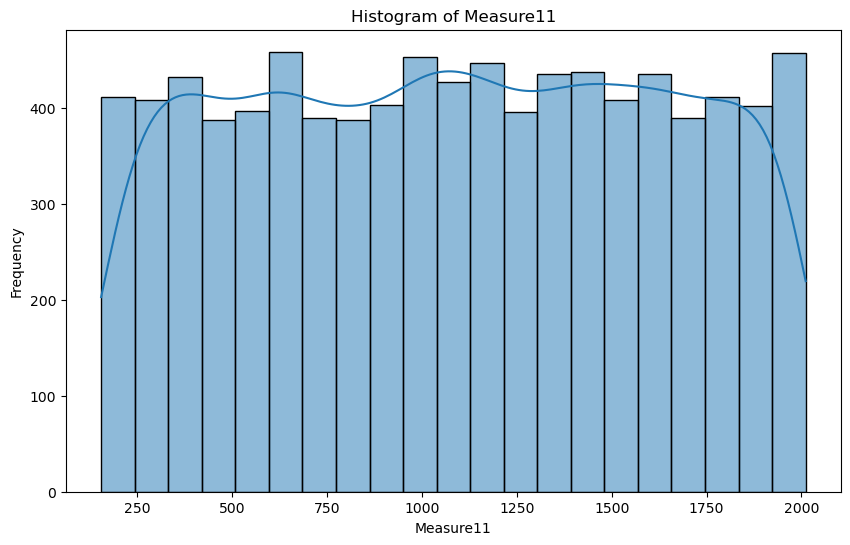

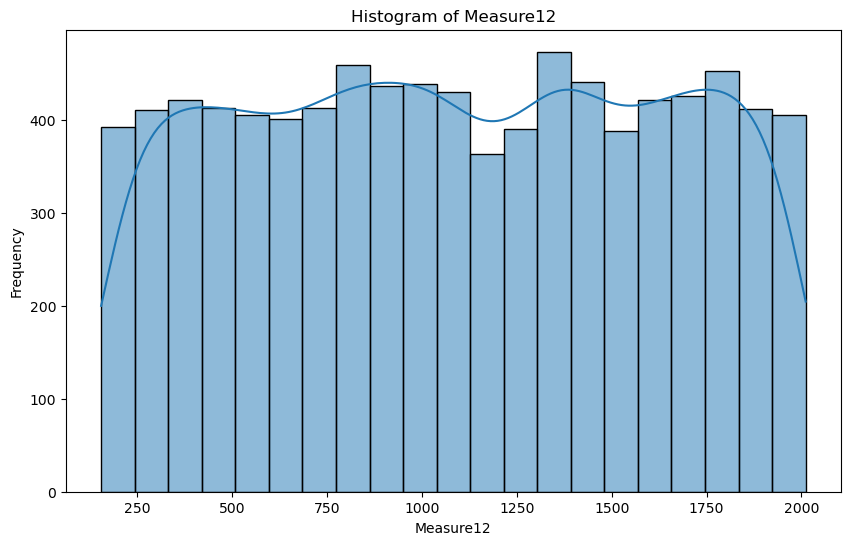

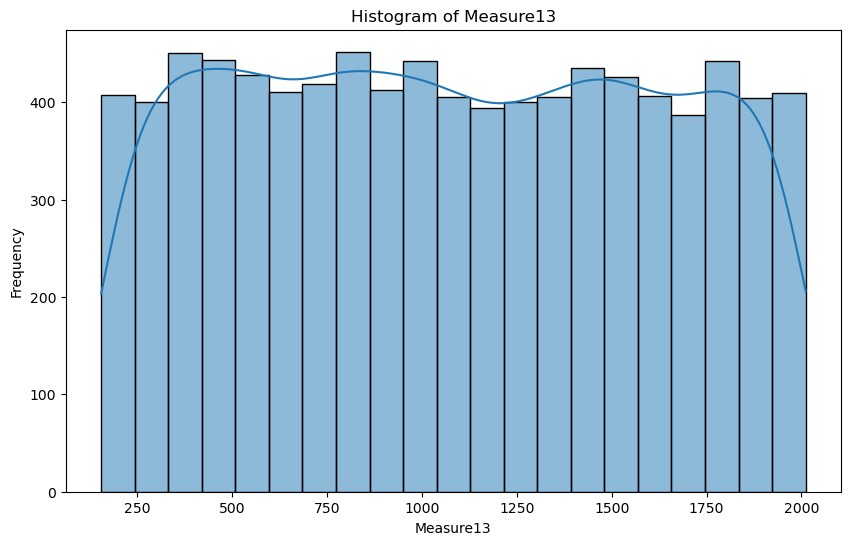

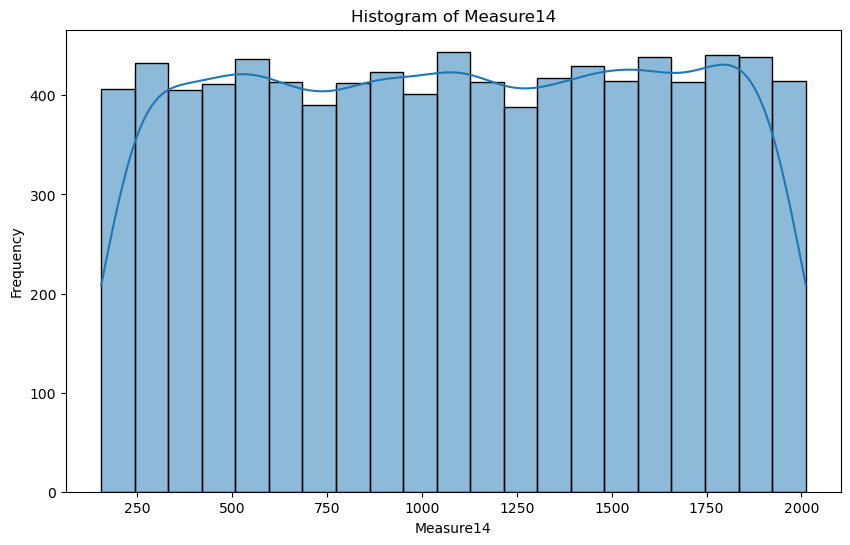

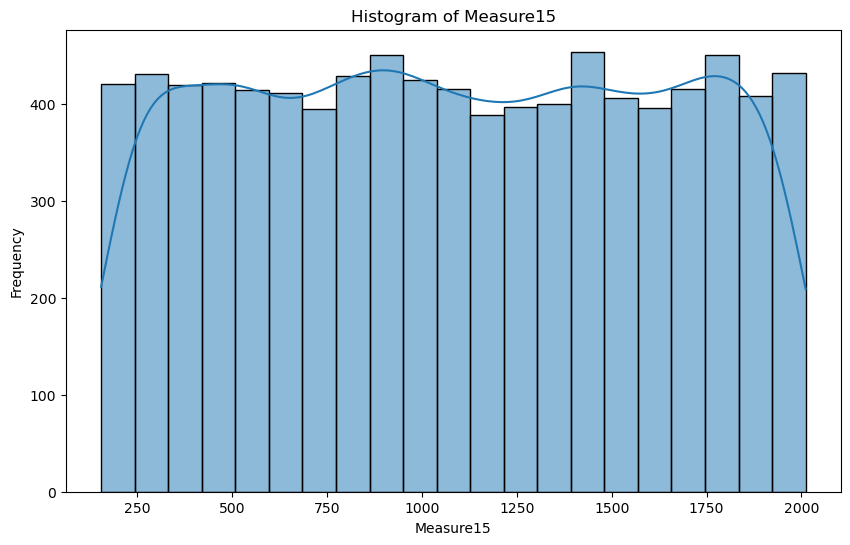

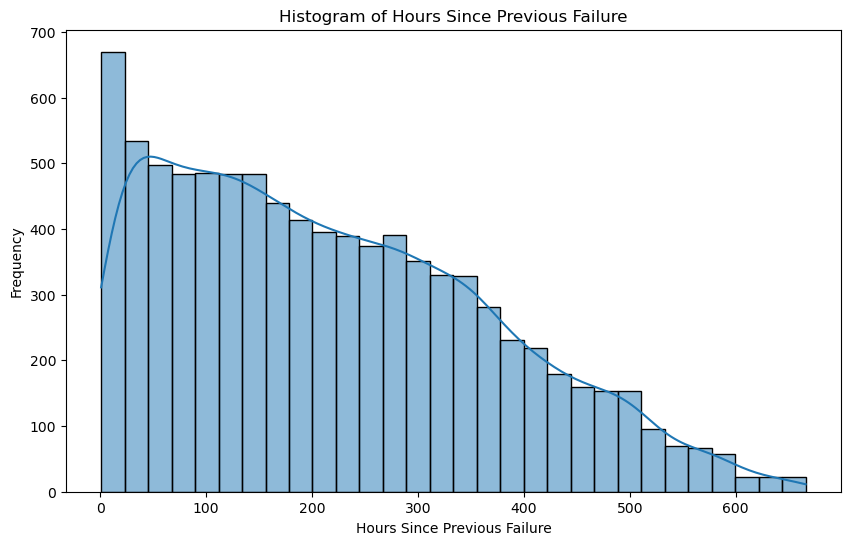

In [9]:
# Plot histograms for integer variables
for var in int_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

   ### Integer Variables: Here I use a histplot with a KDE (Kernel Density Estimate) to show the distribution of the data. This helps in understanding the central tendency, spread, and shape of the data distribution.

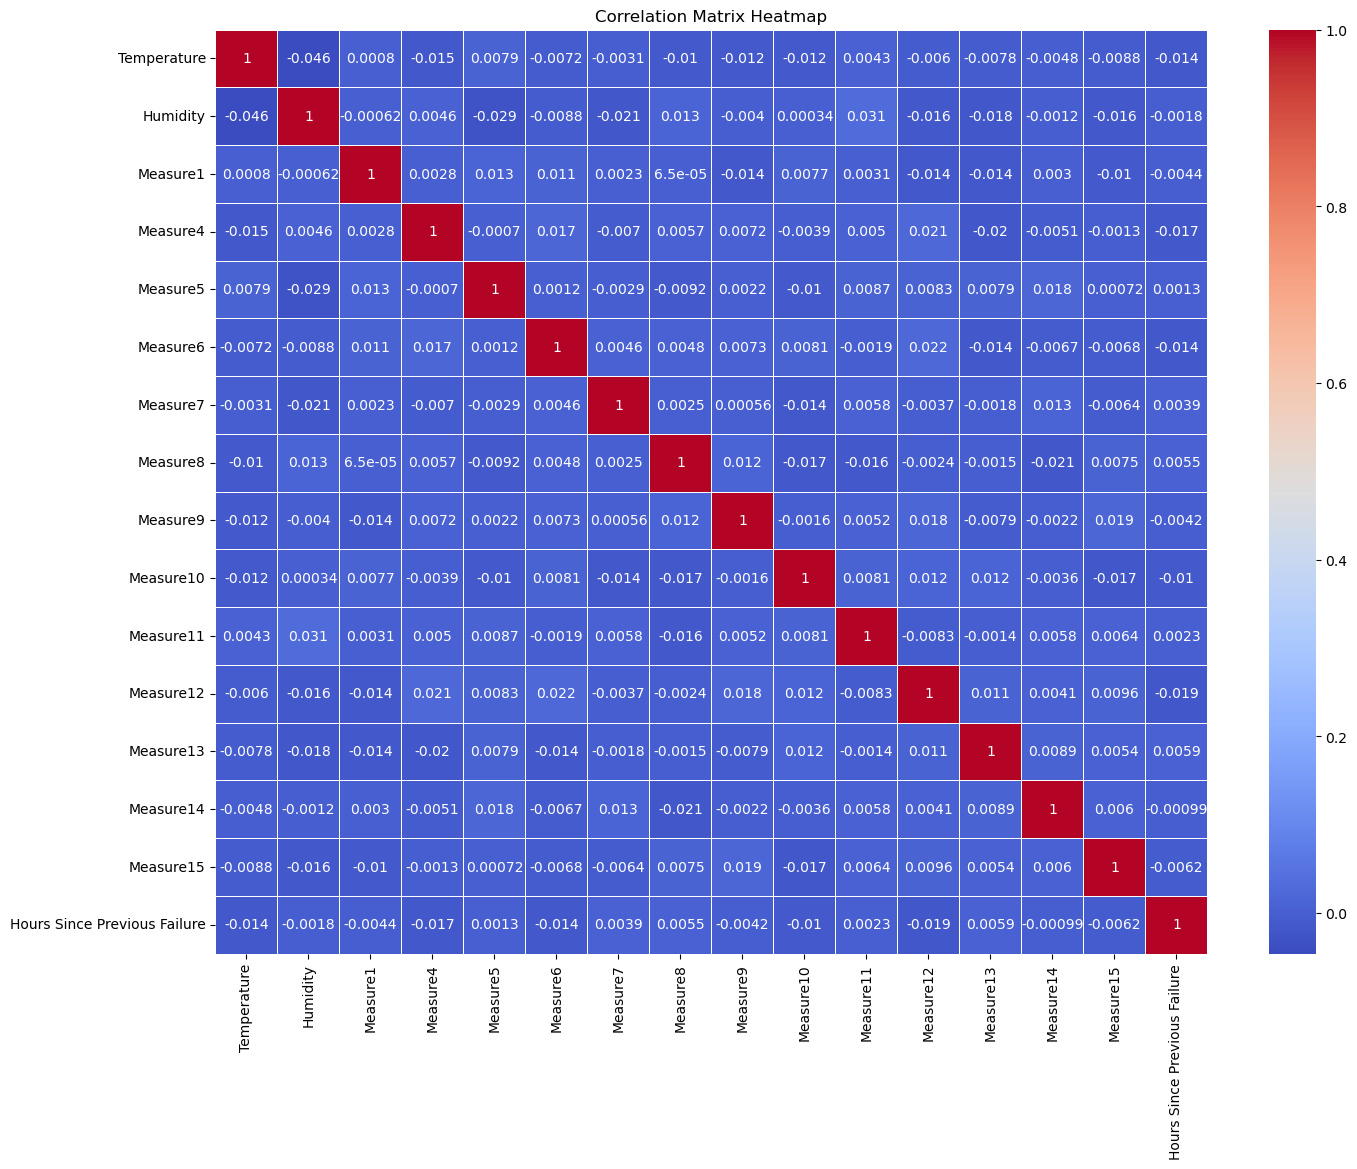

In [10]:
# I Select the numerical columns for correlation analysis
numerical_cols = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
                  'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
                  'Measure14', 'Measure15', 'Hours Since Previous Failure']

# I Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# I Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# Separate majority and minority classes
df_majority = df[df['Failure'] == 'No']
df_minority = df[df['Failure'] == 'Yes']

# Determine the desired number of samples in the majority class (80% of total samples)
n_minority = len(df_minority)
n_majority = int((4 * n_minority) / 1)  # approximately 80% No's and 20% Yes's

# Undersample the majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,    # sample without replacement
                                    n_samples=n_majority,     # to match the desired 80% ratio
                                    random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Check the new class distribution
print(df_balanced['Failure'].value_counts())

Failure
No     324
Yes     81
Name: count, dtype: int64


In [12]:
features = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
            'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
            'Measure14', 'Measure15', 'Hours Since Previous Failure']
target = 'Failure'

In [13]:
X = df[features]
y = df[target]

# Encode the target variable into numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Pruebas sin ningun tipo de sampling, ni scaling:

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression,
    KNeighborsClassifier,
    # RadiusNeighborsClassifier,
    SVC,
    GaussianNB,
    BernoulliNB,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
]

for model in models:
    model_experiment(X, y, model)

Beginning Experiment for Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.57      0.73        14

    accuracy                           1.00      1757
   macro avg       1.00      0.79      0.86      1757
weighted avg       1.00      1.00      1.00      1757


ROC-AUC Score: 0.7857142857142857

Confusion Matrix:
[[1743    0]
 [   6    8]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packag

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.svm._classes.SVC'>


c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packag

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.naive_bayes.GaussianNB'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.43      0.60        14

    accuracy                           1.00      1757
   macro avg       1.00      0.71      0.80      1757
weighted avg       1.00      1.00      0.99      1757


ROC-AUC Score: 0.7142857142857143

Confusion Matrix:
[[1743    0]
 [   8    6]]
----------------------------

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.71      0.83        14

    accuracy                           1.00      1757
   macro avg       1.00      0.86      0.92      1757
weighted avg       1.00      1.00      1.00      1757


ROC-AUC Score: 0.8571428571428572

Confusion Matrix:
[[1743    0]
 [   4   10]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1743
           1       0.50      0.71      0.59        14

    accuracy                           0.99      1757
   macro avg       0.75      0.85      0.79      1757
weighted avg       0.99      0.99      0.99      1757


ROC-AUC Score: 0.8542742398164085

Confusion Matrix:
[[1733   10]
 [   4   1

Pruebas con scaling, pero sin ningun tipo de sampling:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression,
    KNeighborsClassifier,
    # RadiusNeighborsClassifier,
    SVC,
    GaussianNB,
    BernoulliNB,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
]

scalers = [
    MinMaxScaler,
    MinMaxScaler,
    # MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    None,
    None,
    None,
    None
]

for model, scaler in zip(models, scalers):
    model_experiment(X, y, model, scaling=scaler)

Beginning Experiment for Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>


c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packag

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.svm._classes.SVC'>


c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lyes_\anaconda3\Lib\site-packag

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1743
           1       0.00      0.00      0.00        14

    accuracy                           0.99      1757
   macro avg       0.50      0.50      0.50      1757
weighted avg       0.98      0.99      0.99      1757


ROC-AUC Score: 0.5

Confusion Matrix:
[[1743    0]
 [  14    0]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.naive_bayes.GaussianNB'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.43      0.60        14

    accuracy                           1.00      1757
   macro avg       1.00      0.71      0.80      1757
weighted avg       1.00      1.00      0.99      1757


ROC-AUC Score: 0.7142857142857143

Confusion Matrix:
[[1743    0]
 [   8    6]]
----------------------------

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       1.00      0.71      0.83        14

    accuracy                           1.00      1757
   macro avg       1.00      0.86      0.92      1757
weighted avg       1.00      1.00      1.00      1757


ROC-AUC Score: 0.8571428571428572

Confusion Matrix:
[[1743    0]
 [   4   10]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1743
           1       0.55      0.79      0.65        14

    accuracy                           0.99      1757
   macro avg       0.77      0.89      0.82      1757
weighted avg       0.99      0.99      0.99      1757


ROC-AUC Score: 0.890275387263339

Confusion Matrix:
[[1734    9]
 [   3   11

Pruebas con oversampling, undersampling y scaling:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression,
    KNeighborsClassifier,
    # RadiusNeighborsClassifier,
    SVC,
    GaussianNB,
    BernoulliNB,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
]

scalers = [
    MinMaxScaler,
    MinMaxScaler,
    # MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    None,
    None,
    None,
    None
]

for model, scaler in zip(models, scalers):
    model_experiment(X, y, model, scaling=scaler, oversample=0.7, undersample=1)

Beginning Experiment for Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1743
           1       0.07      0.79      0.13        14

    accuracy                           0.92      1757
   macro avg       0.53      0.85      0.54      1757
weighted avg       0.99      0.92      0.95      1757


ROC-AUC Score: 0.8512621916236374

Confusion Matrix:
[[1598  145]
 [   3   11]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1743
           1       0.01      0.21      0.03        14

    accuracy                           0.88      1757
   macro avg       0.50      0.55      0.48      1757
weighted avg       0.99      0.88

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1743
           1       0.17      0.79      0.28        14

    accuracy                           0.97      1757
   macro avg       0.58      0.88      0.63      1757
weighted avg       0.99      0.97      0.98      1757


ROC-AUC Score: 0.8773666092943201

Confusion Matrix:
[[1689   54]
 [   3   11]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1743
           1       0.25      0.71      0.37        14

    accuracy                           0.98      1757
   macro avg       0.62      0.85      0.68      1757
weighted avg       0.99      0.98      0.99      1757


ROC-AUC Score: 0.8485370051635113

Confusion Matrix:
[[1713   30]
 [   4   1

Pruebas con oversampling, sin undersampling:

In [17]:
from ml_toolkit.metrics import model_experiment_avg_metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

models = [
    LogisticRegression,
    KNeighborsClassifier,
    # RadiusNeighborsClassifier,
    SVC,
    GaussianNB,
    BernoulliNB,
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
]

scalers = [
    MinMaxScaler,
    MinMaxScaler,
    # MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    MinMaxScaler,
    None,
    None,
    None,
    None
]

for model, scaler in zip(models, scalers):
    model_experiment_avg_metrics(X, y, model, n_splits=10, scaling=scaler, oversample=0.7)

Beginning Experiment for Model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8703
           1       0.12      0.80      0.21        81

    accuracy                           0.94      8784
   macro avg       0.56      0.87      0.59      8784
weighted avg       0.99      0.94      0.96      8784


ROC-AUC Score: 0.8731982585826087

Confusion Matrix:
[[8215  488]
 [  16   65]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96      8703
           1       0.02      0.17      0.04        81

    accuracy                           0.92      8784
   macro avg       0.51      0.55      0.50      8784
weighted avg       0.98      0.92

c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lyes_\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\lye

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8703
           1       0.20      0.75      0.32        81

    accuracy                           0.97      8784
   macro avg       0.60      0.86      0.65      8784
weighted avg       0.99      0.97      0.98      8784


ROC-AUC Score: 0.8627548610313174

Confusion Matrix:
[[8463  240]
 [  20   61]]
--------------------------------------------------

Beginning Experiment for Model: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8703
           1       0.40      0.77      0.52        81

    accuracy                           0.99      8784
   macro avg       0.70      0.88      0.76      8784
weighted avg       0.99      0.99      0.99      8784


ROC-AUC Score: 0.8773156127516692

Confusion Matrix:
[[8609   94]
 [  19   6

Basado en las métricas de evaluación obtenidas, el modelo más preciso para predecir fallas en la máquina parece ser el RandomForestClassifier (RFC), debido a los siguientes aspectos:
Recall: logra un gran porcentaje (78%) en la clasificación correcta.
Puntuación ROC-AUC: RFC también cuenta con una puntuación ROC-AUC alta (0.89), que representa la capacidad del modelo para discriminar entre estados de máquina defectuosos y normales.
F1:0.79
Accuracy: >99.5%

Este GridSearch ayudaria a optimizar pero no lo usamos dado al procesamiento requerido para optimizar tantos hiperparametros y usamos una mucho mas restringida a continuacion.

In [19]:
from sklearn.model_selection import GridSearchCV
import numpy as np

rf_params = {
    'n_estimators': range(10, 261, 50),
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, *range(1, 52, 5)],
    'min_samples_split': [None, *np.arange(0.1, 1, 0.1)],
    'min_samples_leaf': range(1, 11, 1),
    'class_weight': ['balanced', 'balanced_subsample', None],
    'ccp_alpha': np.arange(0.01, 1.1, 0.1),
    'n_jobs': [-1]
}

model = RandomForestClassifier()

grid_solver = GridSearchCV( estimator = model, 
                                    param_grid = rf_params, 
                                    scoring = ["roc_auc", "recall", "f1"],
                                    cv = 5,
                                    refit = "recall",
                                    n_jobs = -1,
                                    verbose = 2
                                )

model_result = grid_solver.fit(X, y)

Fitting 5 folds for each of 475200 candidates, totalling 2376000 fits


Intentando investigar parametros class_weight y ccp_alpha con procesamiento mas realista. El resto default.

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

rf_params = {
    'class_weight': ['balanced', 'balanced_subsample', None],
    'ccp_alpha': np.arange(0.01, 1.1, 0.1),
    'n_jobs': [-1]
}

model = RandomForestClassifier()

grid_solver = GridSearchCV( estimator = model, 
                                    param_grid = rf_params, 
                                    scoring = ["roc_auc", "recall", "f1"],
                                    cv = 5,
                                    refit = "recall",
                                    n_jobs = -1,
                                    verbose = 2
                                )

model_result = grid_solver.fit(X, y)

Determinando que los mejores modelos utilizan class_weight = 'balanced' y ccp_alpha = 0.01, pero no probamos un valor de 0, asi que optamos por el default de 0 que es cerca de 0.01

Primero hicimos un experimento para probar distintos valores de oversampling y undersampling, pero con todos los defaults (no usando el 'balanced' class_weight):

In [ ]:
import numpy as np

Model = RandomForestClassifier

best_models_metrics = []
best_models_os_us = []

for os in np.arange(0, 1.1, 0.1):
  print("-"*20)
  print("Oversampling: ", os)
  for us in np.arange(0, 1.1, 0.1):
    print("Undersampling: ", us)
    print("-"*20)
    metrics = model_experiment_avg_metrics(X, y, Model, oversample=os, undersample=us)
    if metrics['f1'] > 0.7 or metrics['recall'] > 0.7 or metrics['roc-auc'] > 0.88:
      best_models_metrics.append(metrics)
      best_models_os_us.append((os, us))


Guardamos los resultados en un dataframe, y de ahi en un CSV, junto a los valores de oversampling y undersampling usados:

In [ ]:
df = pd.DataFrame(best_models_metrics)
df = pd.concat([df, pd.DataFrame(best_models_os_us, columns=['oversampling', 'undersampling'])], axis=1)
df.to_csv('os_us_test.csv')

Despues hicimos un experimento para probar distintos valores de oversampling y undersampling, usando el 'balanced' class_weight identificado como el mejor valor de class_weight:

In [ ]:
import numpy as np

params = {'class_weight': 'balanced'}

Model = RandomForestClassifier

best_balanced_model_metrics = []
best_balanced_model_os_us = []

for os in np.arange(0, 1.1, 0.1):
  print("-"*20)
  print("Oversampling: ", os)
  for us in np.arange(0, 1.1, 0.1):
    print("Undersampling: ", us)
    print("-"*20)
    model, metrics = model_experiment(X, y, Model, params, oversample=os, undersample=us)
    if metrics['f1'] > 0.7 or metrics['recall'] > 0.7 or metrics['roc-auc'] > 0.88:
      best_balanced_model_metrics.append(metrics)
      best_balanced_model_os_us.append((os, us))


Guardamos los resultados en un dataframe, y de ahi en un CSV, junto a los valores de oversampling y undersampling usados:

In [ ]:
df = pd.DataFrame(best_balanced_model_metrics)
df = pd.concat([df, pd.DataFrame(best_balanced_model_os_us, columns=['oversampling', 'undersampling'])], axis=1)
df.to_csv('balanced_os_us_test.csv')

Leyendo los resultados, usando recall, f1 y roc-auc como nuestra metricas principales, con ese orden de prioridad, nos da:

In [ ]:
df = pd.read_csv('os_us_test.csv')
df_balanced = pd.read_csv('balanced_os_us_test.csv')

In [ ]:
df.sort_values(['recall', 'f1', 'roc-auc'], ascending=[False, False, False])

,Unnamed: 0,report,roc-auc,confusion,accuracy,f1,precision,recall,sensitivity,specificity,oversampling,undersampling
1,1,precision recall f1-score ...,0.914346,[[8394 309]\n [ 11 70]],0.963570,0.304348,0.184697,0.864198,0.864198,0.964495,0.0,0.1
7,7,precision recall f1-score ...,0.911359,[[8342 361]\n [ 11 70]],0.957650,0.273438,0.162413,0.864198,0.864198,0.958520,0.0,0.7
5,5,precision recall f1-score ...,0.911244,[[8340 363]\n [ 11 70]],0.957423,0.272374,0.161663,0.864198,0.864198,0.958290,0.0,0.5
3,3,precision recall f1-score ...,0.908486,[[8292 411]\n [ 11 70]],0.951958,0.249110,0.145530,0.864198,0.864198,0.952775,0.0,0.3
9,9,precision recall f1-score ...,0.906131,[[8251 452]\n [ 11 70]],0.947291,0.232172,0.134100,0.864198,0.864198,0.948064,0.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
104,104,precision recall f1-score ...,0.874647,[[8670 33]\n [ 20 61]],0.993966,0.697143,0.648936,0.753086,0.753086,0.996208,0.9,0.5
105,105,precision recall f1-score ...,0.874073,[[8660 43]\n [ 20 61]],0.992828,0.659459,0.586538,0.753086,0.753086,0.995059,0.9,0.6
101,101,precision recall f1-score ...,0.873958,[[8658 45]\n [ 20 61]],0.992600,0.652406,0.575472,0.753086,0.753086,0.994829,0.9,0.2
106,106,precision recall f1-score ...,0.868245,[[8666 37]\n [ 21 60]],0.993397,0.674157,0.618557,0.740741,0.740741,0.995749,0.9,0.7


In [ ]:
df_balanced.sort_values(['recall', 'f1', 'roc-auc'], ascending=[False, False, False])

,Unnamed: 0,report,roc-auc,confusion,accuracy,f1,precision,recall,sensitivity,specificity,oversampling,undersampling
44,44,precision recall f1-score ...,0.962851,[[1738 5]\n [ 1 13]],0.996585,0.812500,0.722222,0.928571,0.928571,0.997131,0.4,0.1
24,24,precision recall f1-score ...,0.961130,[[1732 11]\n [ 1 13]],0.993170,0.684211,0.541667,0.928571,0.928571,0.993689,0.2,0.3
15,15,precision recall f1-score ...,0.960843,[[1731 12]\n [ 1 13]],0.992601,0.666667,0.520000,0.928571,0.928571,0.993115,0.1,0.5
1,1,precision recall f1-score ...,0.927281,[[1614 129]\n [ 1 13]],0.926010,0.166667,0.091549,0.928571,0.928571,0.925990,0.0,0.2
4,4,precision recall f1-score ...,0.927281,[[1614 129]\n [ 1 13]],0.926010,0.166667,0.091549,0.928571,0.928571,0.925990,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
33,33,precision recall f1-score ...,0.854848,[[1735 8]\n [ 4 10]],0.993170,0.625000,0.555556,0.714286,0.714286,0.995410,0.3,0.1
18,18,precision recall f1-score ...,0.854561,[[1734 9]\n [ 4 10]],0.992601,0.606061,0.526316,0.714286,0.714286,0.994836,0.1,0.8
25,25,precision recall f1-score ...,0.854274,[[1733 10]\n [ 4 10]],0.992032,0.588235,0.500000,0.714286,0.714286,0.994263,0.2,0.4
26,26,precision recall f1-score ...,0.854274,[[1733 10]\n [ 4 10]],0.992032,0.588235,0.500000,0.714286,0.714286,0.994263,0.2,0.5


Basado en este analisis, encontramos un modelo con:

Recall: 0.93

F1: 0.81

ROC-AUC: 0.96

Accuracy: 0.9966



Esto se encontro usando los siguientes valores:

Oversampling: 0.4

Undersampling: 0.1

Class Weight: Balanced

Una vez seleccionado el modelo predictivo, lo ponemos en práctica:

In [ ]:
model = RandomForestClassifier
params = {'class_weight': 'balanced', 'n_estimators': 500}

metrics = model_experiment_avg_metrics(X, y, model, params, n_splits=10, oversample=0.4, undersample=0.1)

Beginning Experiment for Model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8703
           1       0.64      0.78      0.70        81

    accuracy                           0.99      8784
   macro avg       0.82      0.89      0.85      8784
weighted avg       0.99      0.99      0.99      8784


ROC-AUC Score: 0.886820636562105

Confusion Matrix:
[[8667   36]
 [  18   63]]
--------------------------------------------------



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

df = pd.read_csv("data/Data_Machine_Failure_with_Measurements.csv", sep = ';')

features = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
            'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
            'Measure14', 'Measure15', 'Hours Since Previous Failure']
target = 'Failure'

X = df[features]
y = df[target]

# Aplicamos LabelEncoder para cadenas "si" y "no"
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Preprocesamiento de sampling hibrido - over y undersampling
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X, y = smote.fit_resample(X, y)

undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)

X, y = undersample.fit_resample(X, y)

# Entrenamos el modelo
model = RandomForestClassifier(n_estimators= 1000, class_weight='balanced')
model.fit(X, y)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [ ]:
df = pd.read_csv("data/Data_Machine_Failure_with_Measurements.csv", sep = ';')

features = ['Temperature', 'Humidity', 'Measure1', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 
            'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 
            'Measure14', 'Measure15', 'Hours Since Previous Failure']
target = 'Failure'

X = df[features]
y = df[target]

y = label_encoder.transform(y)

# Hacemos predicciones sobre todo el conjunto de datos
predicted_failures = model.predict(X)
failure_probabilities = model.predict_proba(X)

# Convertimos las etiquetas numéricas predichas a categóricas
predicted_failure_labels = label_encoder.inverse_transform(predicted_failures)

# Recreamos dataframe
df = pd.concat([X, pd.DataFrame(y, columns=['Failure'])], axis=1)

# Añadir las predicciones y probabilidades al DataFrame
df['Predicted_Failure'] = predicted_failure_labels
df['Failure_Probability'] = failure_probabilities[:, 1]

Resultado, mostrando la probabilidad de falla de una maquina:

In [ ]:
df

,Temperature,Humidity,Measure1,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,Predicted_Failure,Failure_Probability
0,67,82,291,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,0,No,0.016
1,68,77,1180,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,0,No,0.079
2,64,76,1406,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,0,No,0.088
3,63,80,550,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,0,No,0.087
4,65,81,1928,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,0,No,0.163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,66,79,937,1875,1719,219,748,1901,819,546,901,1512,1477,537,410,7,0,No,0.131
8780,60,77,379,814,1990,1606,1346,962,875,1067,608,251,1476,522,943,8,0,No,0.020
8781,61,77,595,1659,1134,1314,907,1119,1623,272,1149,1951,1835,1554,200,9,0,No,0.041
8782,72,81,1038,254,1400,564,216,1011,1909,502,470,1331,1696,229,1192,10,0,No,0.214


Metricas finales

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['Failure'], label_encoder.transform(df['Predicted_Failure'])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8703
           1       0.86      1.00      0.93        81

    accuracy                           1.00      8784
   macro avg       0.93      1.00      0.96      8784
weighted avg       1.00      1.00      1.00      8784



Guardar el modelo como un Pickle file (.pkl)

In [ ]:
import pickle

pickle.dump(model, open('final_model.pkl', 'wb'))

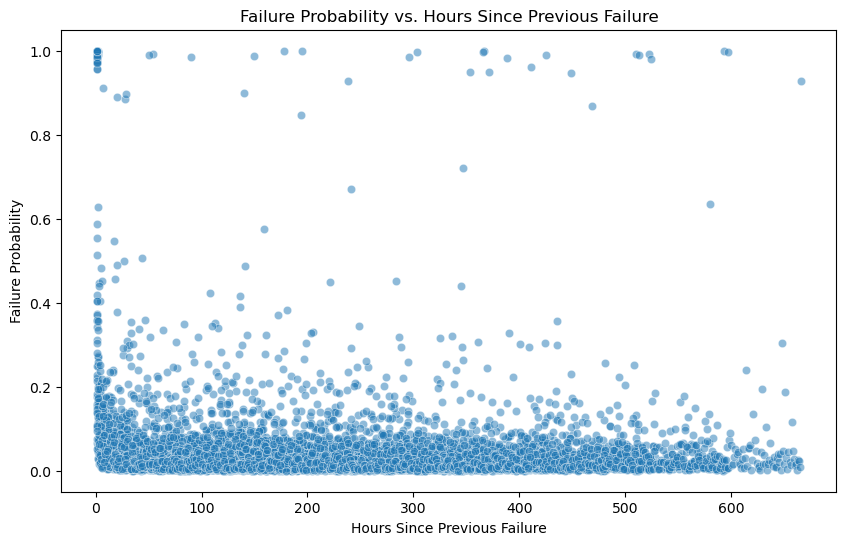

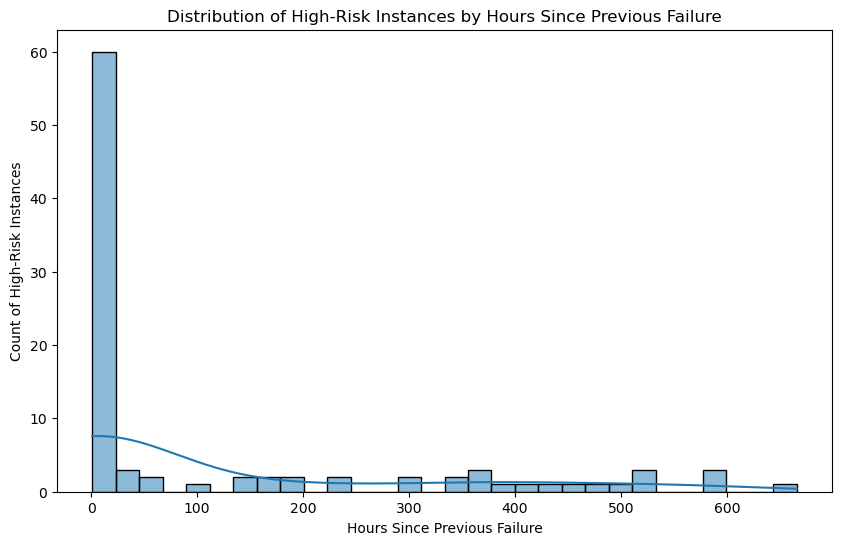

In [ ]:
# Scatter plot of failure probability vs. hours since previous failure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours Since Previous Failure', y='Failure_Probability', data=df, alpha=0.5)
plt.xlabel('Hours Since Previous Failure')
plt.ylabel('Failure Probability')
plt.title('Failure Probability vs. Hours Since Previous Failure')
plt.show()
# Histogram of hours since previous failure for high-risk instances
critical_threshold = 0.5
high_risk_instances = df[df['Failure_Probability'] > critical_threshold]
plt.figure(figsize=(10, 6))
sns.histplot(high_risk_instances['Hours Since Previous Failure'], bins=30, kde=True)
plt.xlabel('Hours Since Previous Failure')
plt.ylabel('Count of High-Risk Instances')
plt.title('Distribution of High-Risk Instances by Hours Since Previous Failure')
plt.show()